# Data Augmentation on Venice Facade Dataset
Randomly generate irregular patches (noise, or missing parts) on current complete facade to generate complete-incomplete facade pairs.

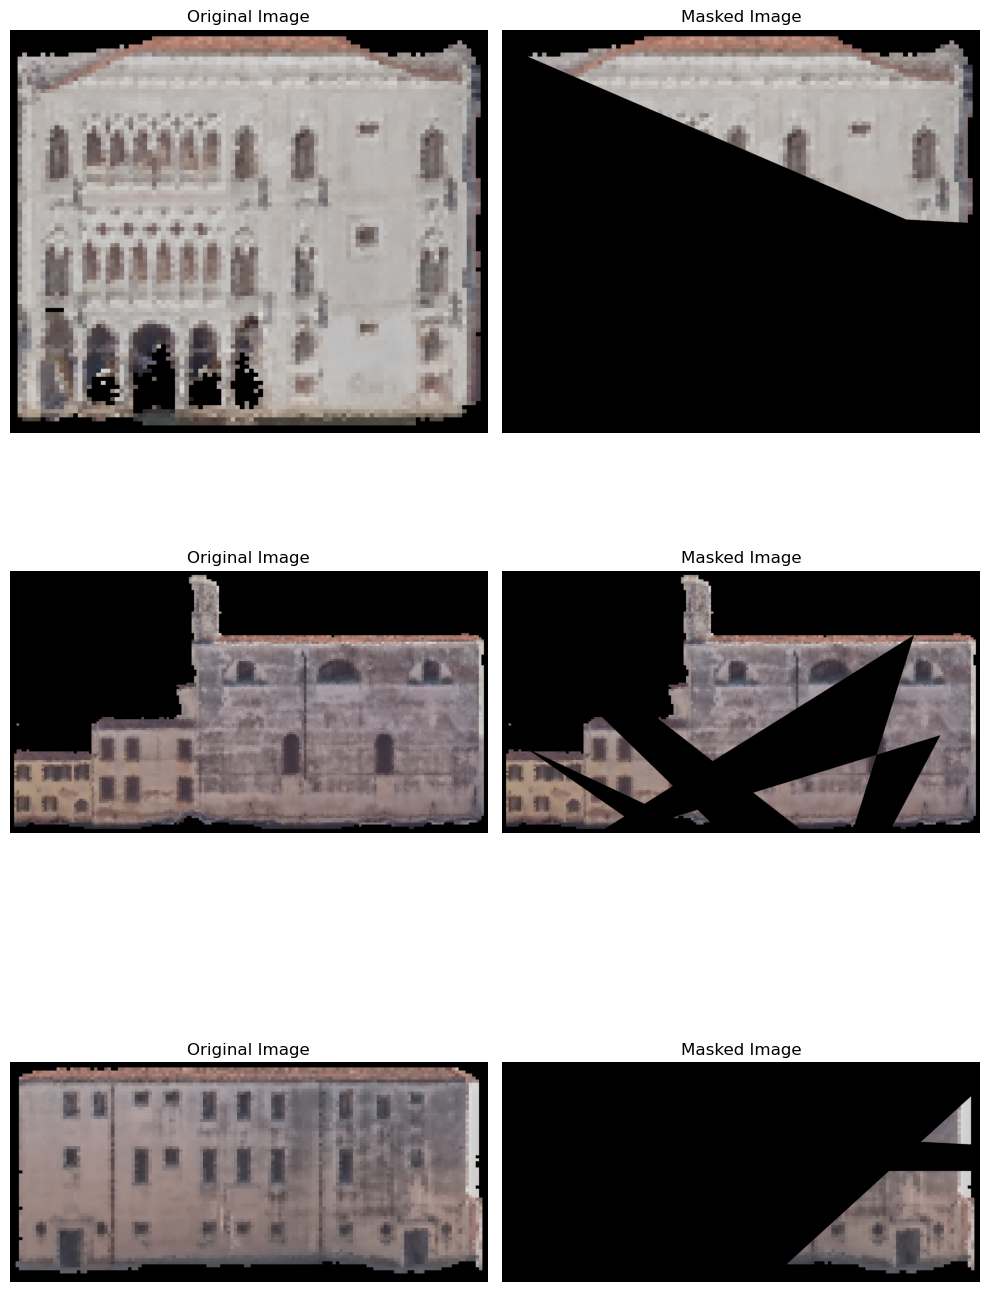

In [9]:
import os
import numpy as np
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt

def create_random_irregular_mask(image, max_patches, min_vertices, max_vertices, min_size, max_size):
    """
    Generate a random mask with irregularly shaped missing parts on an image.
    
    Parameters:
        image (PIL.Image): The complete facade image to add missing parts to.
        max_patches (int): Maximum number of missing patches to generate.
        min_vertices (int): Minimum number of vertices for each polygon (irregular shape).
        max_vertices (int): Maximum number of vertices for each polygon (irregular shape).
        min_size (int): Minimum size of a missing patch.
        max_size (int): Maximum size of a missing patch.
        
    Returns:
        masked_image (PIL.Image): Image with randomly generated irregular missing parts.
    """
    masked_image = image.copy()
    draw = ImageDraw.Draw(masked_image)
    width, height = image.size

    for _ in range(random.randint(1, max_patches)):
        # Randomly determine the number of vertices for the polygon
        num_vertices = random.randint(min_vertices, max_vertices)
        
        # Generate random points for the polygon
        polygon = []
        for _ in range(num_vertices):
            angle = random.uniform(0, 2 * np.pi)
            radius = random.uniform(min_size, max_size)
            x = int(width / 2 + radius * np.cos(angle))
            y = int(height / 2 + radius * np.sin(angle))
            polygon.append((x, y))
        
        # Translate polygon to a random position within the image boundaries
        dx = random.randint(-width // 4, width // 4)
        dy = random.randint(-height // 4, height // 4)
        polygon = [(x + dx, y + dy) for (x, y) in polygon]

        # Draw the irregular polygon as a missing part (black area)
        draw.polygon(polygon, fill=(0, 0, 0))
    
    return masked_image

def visualize_random_masks_on_images(image_paths, max_patches, min_vertices, max_vertices, min_size, max_size):
    """
    Apply random irregular masks to images and visualize before and after masking.
    
    Parameters:
        image_paths (list of str): List of paths to 3 complete facade images.
        max_patches (int): Maximum number of missing patches per image.
        min_vertices (int): Minimum number of vertices for each irregular patch.
        max_vertices (int): Maximum number of vertices for each irregular patch.
        min_size (int): Minimum size of a missing patch.
        max_size (int): Maximum size of a missing patch.
    """
    fig, axs = plt.subplots(3, 2, figsize=(10, 15))
    
    for i, image_path in enumerate(image_paths):
        image = Image.open(image_path).convert("RGB")
        # Create a masked version of the image
        masked_image = create_random_irregular_mask(image, max_patches, min_vertices, max_vertices, min_size, max_size)
       
        # Plot original and masked images side by side
        axs[i, 0].imshow(image)
        axs[i, 0].set_title("Original Image")
        axs[i, 0].axis("off")
        
        axs[i, 1].imshow(masked_image)
        axs[i, 1].set_title("Masked Image")
        axs[i, 1].axis("off")
    
    plt.tight_layout()
    plt.show()

# Example usage with 3 image paths
image_paths = [
    'data/complete_facades/images/2_[uid_W001]_.png', 
    'data/complete_facades/images/14_[uid_W013]_.png', 
    'data/complete_facades/images/19_[uid_0136]_.png'  
]

#TODO This can be adapted later based on the missing part 
# property analysis on incomplete facade.
max_patches=2
min_vertices= 40
max_vertices= 50
min_size=1000
max_size=4000
visualize_random_masks_on_images(image_paths, max_patches, min_vertices, max_vertices, min_size, max_size)